In [1]:
import os
import torch
import sys
import math 

import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

import matplotlib.pyplot as plt
import torchvision.utils as vutils
from skimage import exposure

In [2]:
channel = 3
mean = [0.425, 0.396, 0.370]
std =  [0.229, 0.224, 0.221]

def plot_spectrogram(aud, ax):
    curr_data=aud.numpy()
    data_equalized = exposure.equalize_adapthist(curr_data)#, clip_limit=0.03)
    ax.imshow(data_equalized, aspect='auto', origin='lower', cmap='viridis')
    # ax.imshow(aud, aspect='auto', origin='lower')
    ax.axis('off')


def plot_aud_grid(aud_syn, fig_size=(15, 10)):
    aud_syn = (aud_syn - aud_syn.min()) / (aud_syn.max() - aud_syn.min())
    num_cols = 7
    num_rows = math.ceil(len(aud_syn) / num_cols)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=fig_size, 
                            gridspec_kw={'wspace':0.02, 'hspace':0.02})

    axs = axs.flatten()
    for i, aud in enumerate(aud_syn):
        plot_spectrogram(aud[0], axs[i])

    for ax in axs[len(aud_syn):]:
        ax.axis('off')
    
    for ax in axs:
        for _, spine in ax.spines.items():
            spine.set_color('black')
            spine.set_linewidth(10)
            spine.set_visible(True)
    plt.show()

def plt_aud_grid_new(aud_syn):
    aud_syn = (aud_syn - aud_syn.min()) / (aud_syn.max() - aud_syn.min())
    aud_syn_list = []
    for aud in aud_syn:
        aud = aud.squeeze().numpy()
        aud = exposure.equalize_adapthist(aud)
        aud = torch.tensor(aud).unsqueeze(0)
        aud_syn_list.append(aud)
    grid = vutils.make_grid(aud_syn_list, nrow=10, normalize=False, padding=5, pad_value=0)
    plt.figure(figsize=(15,15))
    plt.imshow(grid.permute(1, 2, 0).numpy(), cmap='viridis')
    plt.axis('off')

        
def plt_image_grid(img_tensor):
    # img_tensor = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())
    grid = vutils.make_grid(img_tensor, nrow=7, normalize=False, padding=5, pad_value=0)
    plt.figure(figsize=(15,15))
    plt.imshow(grid.permute(1, 2, 0).numpy())
    plt.axis('off')  

def normalize_img(img, aug=False):
    if aug:
        half_h, half_w = img.shape[2]//2, img.shape[3]//2
        a, b, c, d = img[:, :, :half_h, :half_w].clone(), img[:, :, half_h:, :half_w].clone(), img[:, :, :half_h, half_w:].clone(), img[:, :, half_h:, half_w:].clone()
        a, b, c, d = F.upsample(a, scale_factor=2, mode='bilinear'), F.upsample(b, scale_factor=2, mode='bilinear'), F.upsample(c, scale_factor=2, mode='bilinear'), F.upsample(d, scale_factor=2, mode='bilinear')
        for ch in range(channel):
            a[:, ch] = a[:, ch] * std[ch] + mean[ch]
            b[:, ch] = b[:, ch] * std[ch] + mean[ch]
            c[:, ch] = c[:, ch] * std[ch] + mean[ch]
            d[:, ch] = d[:, ch] * std[ch] + mean[ch]

        a = F.upsample(a, scale_factor=0.5, mode='bilinear')
        b = F.upsample(b, scale_factor=0.5, mode='bilinear')
        c = F.upsample(c, scale_factor=0.5, mode='bilinear')
        d = F.upsample(d, scale_factor=0.5, mode='bilinear')

        img[:, :, :half_h, :half_w] = a
        img[:, :, half_h:, :half_w] = b
        img[:, :, :half_h, half_w:] = c
        img[:, :, half_h:, half_w:] = d

    else:
        for ch in range(channel):
            img[:, ch] = img[:, ch]  * std[ch] + mean[ch] 
    return img          

In [3]:
EXP = 0
ITER = 5000

data_path_l1 = 'data/syn_data/VGG_subset_ipc1'

img_l1 = torch.load(os.path.join(data_path_l1, f'exp_{EXP}_imgSyn_{ITER}.pth'), map_location='cpu')
aud_l1 = torch.load(os.path.join(data_path_l1, f'exp_{EXP}_audSyn_{ITER}.pth'), map_location='cpu')
# img_l1 = normalize_img(img_l1)

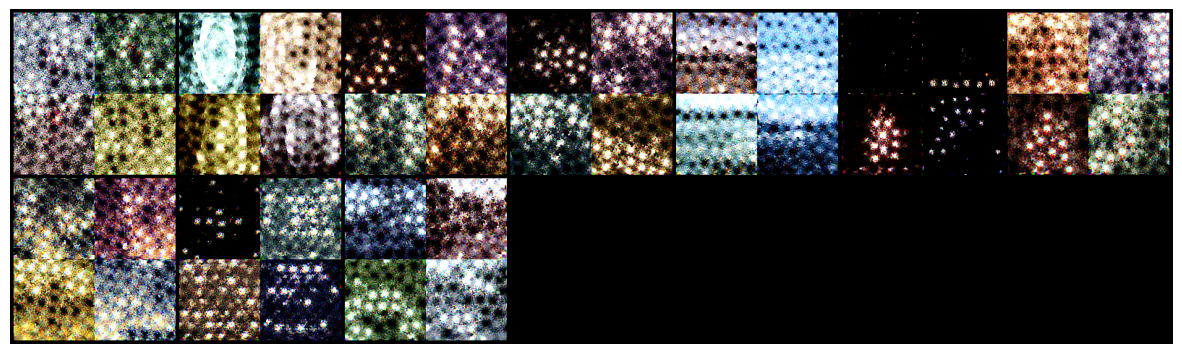

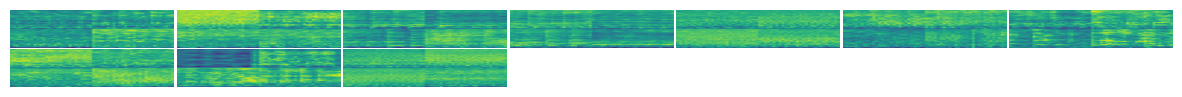

In [4]:
plt_image_grid(img_l1)
plot_aud_grid(aud_l1, fig_size=(15, 1))